In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

In [21]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.shape

(8523, 12)

In [15]:
train.Item_Weight.mean()

np.float64(12.857645184135976)

In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
# Filling Null values

## Option 1
# train['Item_Weight'].fillna(train.Item_Weight.mean())

## Option 2
item_type_average_weight = pd.pivot_table(train, 
                                          index = "Item_Type", 
                                          values = 'Item_Weight', 
                                          aggfunc={'Item_Weight':np.mean}).reset_index()
item_type_average_weight = dict(zip(item_type_average_weight['Item_Type'],
                                    item_type_average_weight['Item_Weight']))


train['Item_Type'] = train[['Item_Weight','Item_Type']].apply(lambda x: item_type_average_weight[x[0]] if type(x[0]) == None else x[0], 1 )

/var/folders/n3/pxxd36b52x11p_lp7pqzq5vw0000gn/T/ipykernel_99866/2535586164.py:7: FutureWarning: The provided callable <function mean at 0x105e2edc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  item_type_average_weight = pd.pivot_table(train,
/var/folders/n3/pxxd36b52x11p_lp7pqzq5vw0000gn/T/ipykernel_99866/2535586164.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train['Item_Type'] = train[['Item_Weight','Item_Type']].apply(lambda x: item_type_average_weight[x[0]] if type(x[0]) == None else x[0], 1 )


In [24]:
train['Item_Type'].nunique()

16

In [22]:
train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

<Figure size 7200x720 with 0 Axes>

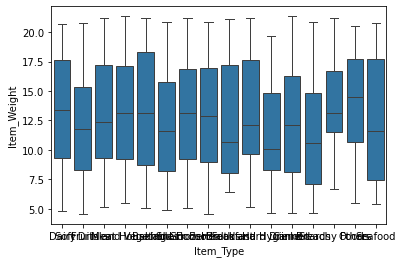

<Figure size 7200x720 with 0 Axes>

In [31]:
# Comparison of Item_Type and Item_Weight
sns.boxplot(data= train, x = 'Item_Type', y = 'Item_Weight')
plt.figure(figsize = (100, 10))
